In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from pilearn.clustering import MoG

In [2]:
train_df = pd.read_csv('datasets/Iris.csv')
train_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
def make_target(y):
    if y == 'No':
        return 0
    else:
        return 1

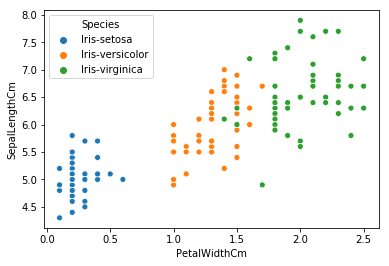

In [5]:
sns.scatterplot(x=train_df.PetalWidthCm, y=train_df.SepalLengthCm, hue=train_df.Species)
plt.show()

In [6]:
X = np.c_[train_df.PetalWidthCm, train_df.SepalLengthCm]

In [7]:
X[:10]

array([[0.2, 5.1],
       [0.2, 4.9],
       [0.2, 4.7],
       [0.2, 4.6],
       [0.2, 5. ],
       [0.4, 5.4],
       [0.3, 4.6],
       [0.2, 5. ],
       [0.2, 4.4],
       [0.1, 4.9]])

In [8]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

In [9]:
X = (X - means) / stds

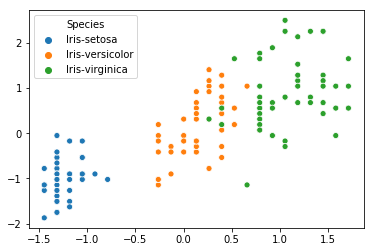

In [10]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=train_df.Species)
plt.show()

In [36]:
mog = MoG(X=X, k=3, n_iter=500)

In [37]:
mog.train()

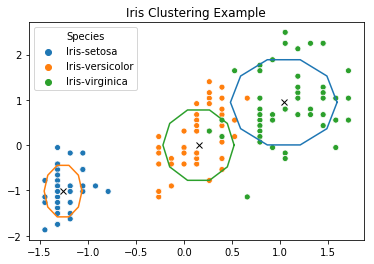

In [38]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=train_df.Species)
mog.plot('Iris Clustering Example', 'iris_clustering_example')
plt.show()